In [1]:
#Калмахелидзе Юлия, курс "Специализация Data Science", DST-10
# Итоговое задание по Юниту 2
# Проект 2 "Разведывательный анализ данных"

# Задача:
#Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН,
#чья миссия состоит в повышении уровня благополучия детей по всему миру.
#Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
#Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена
#по математике для каждого ученика школы.

#Описание датасета (переменные, которые содержит датасет):
#school — аббревиатура школы, в которой учится ученик
#sex — пол ученика ('F' - женский, 'M' - мужской)
#age — возраст ученика (от 15 до 22)
#address — тип адреса ученика ('U' - городской, 'R' - за городом)
#famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
#schoolsup — дополнительная образовательная поддержка (yes или no)
#famsup — семейная образовательная поддержка (yes или no)
#paid — дополнительные платные занятия по математике (yes или no)
#activities — дополнительные внеучебные занятия (yes или no)
#nursery — посещал детский сад (yes или no)
#higher — хочет получить высшее образование (yes или no)
#internet — наличие интернета дома (yes или no)
#romantic — в романтических отношениях (yes или no)
#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#absences — количество пропущенных занятий
#score — баллы по госэкзамену по математике


In [2]:
# 1. Первичный просмотр данных.
# В первую очередь, загружаем необходимые для анализа библиотеки
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind

import math

In [3]:
# исходная база предоставлена в виде файла .csv  

mattest = pd.read_csv('stud_math.csv')

pd.set_option('display.max_columns', 32)

display(mattest.head(10))

mattest.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
# Датасет содержит 30 столбцов: 13 числовых, в том числе 3 с чисто числовыми параметрами (age,
# absenses, score), а остальные 10 содержат оценки в заданных диапазонах;
# 17 строковых, из которых 12 имеют только 2 значения, остальные 5 также некий диапазон
#строковых значений. 
# Один из столбцов 'studytime, granular' отсутствует в вводном описании. 
# Датасет содержит 395 строк, но всего 3 cnjk,wf school, sex, age заполнены полностью,
# остальные имеют пропуски: address - 17, famsize - 27, Pstatus - 45, Medu - 3, Fedu - 24,
  # Mjob - 19, Fjob - 36, reason - 17, guardian - 31, traveltime - 28, studytime - 7,
  # failures - 22, schoolsup - 9, famsup - 39, paid - 40, activities - 14, nursery - 16,
  # studytime, granular - 7, higher - 20, internet - 34, romantic - 31, famrel - 27,
  # freetime - 11, goout - 8, health - 15, absenses - 12, score - 6
#на следующем этапе каждый столбец должен быть по возможности проанализирован отдельно

In [5]:
pd.DataFrame(mattest.school.value_counts())

,school
GP,349
MS,46


In [6]:
pd.DataFrame(mattest.school.describe())

,school
count,395
unique,2
top,GP
freq,349


In [7]:
# Столбец school содержит 2 значения - аббревиатуры школ - можно сделать вывод, что
# анализируются данные всего 2-х школ. Пропусков нет

In [8]:
pd.DataFrame(mattest.sex.value_counts())

,sex
F,208
M,187


In [9]:
pd.DataFrame(mattest.sex.describe())

,sex
count,395
unique,2
top,F
freq,208


In [10]:
#Столбец с полом содержит 2 значения и тоже не имеет пропусков. 

In [11]:
pd.DataFrame(mattest.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [12]:
# Столбец с возрастом также заполнен полностью и поскольку содержит числовые параметры, имеет
# смысл проанализировать его с использованием методов визуализации

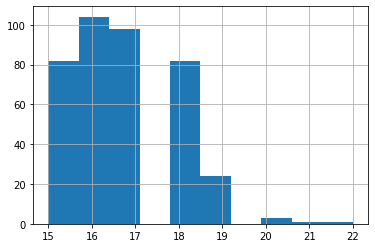

In [13]:
mattest.age.hist()

In [14]:
#визуально есть впечатление, что тут имеют место выбросы и пропуски. Подсчёт значений выше
# показывает, что пропусках в возрасте нет, а выбросы можно проверить диаграммой boxplot

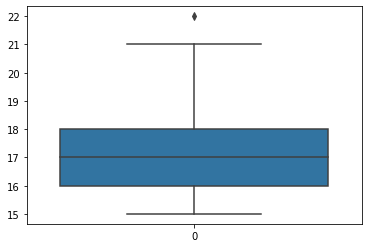

In [15]:
sns.boxplot(data=mattest.age)

In [16]:
# По boxplot-у видно, что выброс включает только возраст 22 года, однако, на предыдущей
# диаграмме возраст 21 год тоже выглядел как выброс, к тому же на этот возраст приходится всего
# 1 ученик. Применим формулу интерквартильного расстояния

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


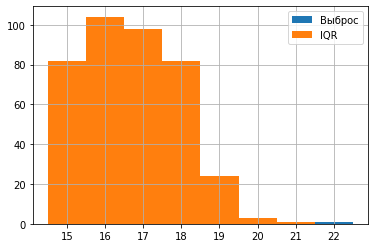

In [17]:
median = mattest.age.median()
IQR = mattest.age.quantile(0.75) - mattest.age.quantile(0.25)
perc25 = mattest.age.quantile(0.25)
perc75 = mattest.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                     l=perc75 + 1.5*IQR))
mattest.age.loc[mattest.age <= 22].hist(bins = 8, range = (14.5, 22.5), label = 'Выброс')


mattest.age.loc[mattest.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, 
                                                                        range = (14.5, 22.5),
                                                                        label = 'IQR')

plt.legend();

In [18]:
# Анализ по формуле интерквартильного расстояния также показал, что выбросом является только 
# возраст 22 года. Есть основания удалить это значение

In [19]:
mattest.loc[mattest['age'] == 22.0, 'age'] = np.nan
mattest.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

In [20]:
# Следующий столбец  address опять содержит всего два значения. Поскольку он такой не один,
# и анализ вряд ли будет информативней столбца sex, рассмотренного выше,
# есть смысл проанализировать его вместе с остальными "двойными" столбцами одновременно

In [21]:
mattest_sup1 = []
sup1 = ['sex', 'address', 'famsize', 'Pstatus', 
                   'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']
for x in sup1:
    a = mattest[x].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        mattest_sup1.append([a[0],a[1]])
    else:
        print("Fail")
mattest_sup1

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [22]:
mattest[sup1].describe()

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,378,368,350,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,F,U,GT3,T,no,yes,no,yes,yes,yes,yes,no
freq,208,295,261,314,335,219,200,195,300,356,305,240


In [23]:
# Объединённый анализ однотипных столбцов показал, что все проанализированные столбцы содержат
# действительно только 2 значения, то есть нет ошибок, не соответствующих предварительному
# описанию. Однако, все столбцы кроме 'sex' имеют пропуски в заполнении. 
# Поскольку нет ниодной идеи, каким образом могут быть заполнены пропуски, а удаление их
# сильно уменьшит выборку, лучше оставить пропуски нетронутыми на данный момент.

In [24]:
# Перед тем, как продолжить с более информативными столбцами стоит обратить внимание на 
# столбец 'studytime, granular'. Его описание отсутствует во вступительном описании, а 
# визуальный анализ наводит на мысль о связи со столбцом 'studytime'.

#Для начала переименуем его для удобства анализа, затем сравним с "эталоном"

In [25]:
mattest.rename(columns = lambda y: y.replace('studytime, granular', 'studytime_dub'), 
               inplace = True)

In [26]:
display(pd.DataFrame(mattest.studytime.value_counts()),pd.DataFrame(mattest.studytime_dub.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,studytime_dub
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [27]:
# Самое явное предположение, что столбец 'studytime_dub' - это результат умножения столбца
# 'studytime' на -3.
mattest['studytime'].corr(mattest['studytime_dub'])

-1.0

In [28]:
# Корреляция полная, что подтверждает подозрение, что составители решили подзапутать, таким
# образом, столбец можно совершенно  без вреда для анализа удалить
mattest.drop(['studytime_dub'], inplace = True, axis = 1)

In [29]:
display(pd.DataFrame(mattest.Medu.value_counts()), pd.DataFrame(mattest.Medu.describe()))

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


,Medu
count,392.000000
mean,2.750000
std,1.098127
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [30]:
# В столбце 'Medu' информация о разных вариантах образования матери. 3 ячейки не заполнены,
# но недостаточно данных, чтобы определить их, к тому же они не сильно влияют на анализ
# на данном этапе

In [31]:
display(pd.DataFrame(mattest.Fedu.value_counts()), pd.DataFrame(mattest.Fedu.describe()))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,Fedu
count,371.000000
mean,2.614555
std,2.228732
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,40.000000


In [32]:
# Бросается в глаза значение, во-первых, отсутствующее в описании, во-вторых, совершенно не
# соразмерное шкале оценки. С большой вероятностью, значение 40.0 - это опечатка и тут должно
# быть 4.0. Есть смысл заменить
mattest.loc[mattest['Fedu'] == 40.0, 'Fedu'] = 4.0
display(pd.DataFrame(mattest.Fedu.value_counts()), pd.DataFrame(mattest.Fedu.describe()))

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


,Fedu
count,371.000000
mean,2.517520
std,1.088808
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [33]:
# Теперь выглядит валидней. В остальном, здесь уже гораздо больше пропусков, 
# но как и с похожим столбцом 'Medu' нет данных, чтобы эти пропуски корректно заполнить

In [34]:
pd.DataFrame(mattest.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [35]:
mattest.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [36]:
# В столбце 'Mjob' перечислены возможные варианты работы матери. Сразу замечание - 
# не все ячейки заполнены. Имеет смысл проставить в пустующих ячейках также значение 'other',
# так как уточнить данные на первой линии уже невозможно, а пункт 'other', как правило,
# используется как агрегирующий для спектра более редких или несущественных
# для анализа вариантов ответов

In [37]:
mattest.Mjob = mattest.Mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
mattest['Mjob'] = mattest['Mjob'].replace('nan', 'other')
mattest.Mjob.value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [38]:
pd.DataFrame(mattest.Fjob.value_counts())

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [39]:
mattest.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [40]:
# Столбец 'Fjob' является по сути аналогом предыдущего столбца, но для отца. Здесь пропусков
# ещё больше. Нет оснований считать, что логика заполнения пропусков предыдущего столбца
# не подойдёт и тут, так что поступим с этим столбцом аналогично

In [41]:
mattest.Fjob = mattest.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
mattest['Fjob'] = mattest['Fjob'].replace('nan', 'other')
mattest.Fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [42]:
pd.DataFrame(mattest.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [43]:
mattest.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [44]:
# Столбец 'reason' содержит варианты причин выбора школы. Здесь также есть незаполненные
# значения и также присутствует пункт 'other'. Так же считаю, что этим пунктом можно заполнить
# пустующие значения

In [45]:
mattest.reason = mattest.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)
mattest['reason'] = mattest['reason'].replace('nan', 'other')
mattest.reason.value_counts()

course        137
home          104
reputation    103
other          51
Name: reason, dtype: int64

In [46]:
pd.DataFrame(mattest.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [47]:
# Столбец 'guardian' мог бы относиться к бинарным, однако и он содержит пункт 'other', что
# подразумевает полноценный третий вариант. Нет повода не заполнить пунктом 'other' пропуски
# в этом столбце. Логика та же - вариант "другое" актуален, когда предложенные варианты либо
# либо не подходят, либо отвечавший затруднялся с ответом.

In [48]:
mattest.guardian = mattest.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
mattest['guardian'] = mattest['guardian'].replace('nan', 'other')
mattest.guardian.value_counts()

mother    250
father     86
other      59
Name: guardian, dtype: int64

In [49]:
pd.DataFrame(mattest.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [50]:
mattest.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [51]:
# Столбец 'traveltime' является числовым и содержит оценочные грейды для временных интервалов
# пути до школы. Здесь также имеются пропуски, но в отличие от предыдущих столбцов нет никаких
# однозначных вариантов для их заполнения. Здесь лучше пропуски пока не трогать. В остальном,
# ошибок не замечено, значения соответствуют входящему описанию

In [52]:
pd.DataFrame(mattest.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [53]:
# Столбец 'failures' отображает количество внеучебных неудач и содержит условие, которое, на
# первый взгляд делает его бинарным. То есть неудачи 1<=n<3 считаются как их отсутствие, и только
# 4 неудачи (и возможно более) должны содержать значение 4. Однако, видно, что нет ни одного
# значения 4, то есть достаточного для учёта количества неудач. С другой стороны, в столбце всё
# таки выделены отдельно неудачи по количеству. Наконец, не совсем понятно, что именно
# подразумевается под внеучебными неудачами. Есть смысл посмотреть хотя бы на корреляцию с
# целевым показателем score

In [54]:
mattest['failures'].corr(mattest['score'])

-0.3443382999897429

In [55]:
# Корреляция есть, имеет смысл посмотреть на неё подробнее, например, как failures распределены
# по score

In [56]:
display(pd.DataFrame(mattest.groupby(['score','failures']).school.count()))

school
score failures        
0.0   0.0           17
      1.0           10
      2.0            4
      3.0            4
20.0  2.0            1
25.0  0.0            3
      1.0            2
      2.0            1
      3.0            1
30.0  0.0           15
35.0  0.0            3
      1.0            2
      2.0            1
      3.0            3
40.0  0.0           15
      1.0           10
      2.0            2
      3.0            1
45.0  0.0           20
      1.0            2
      2.0            3
      3.0            1
50.0  0.0           41
      1.0            6
      2.0            1
      3.0            4
55.0  0.0           41
      1.0            3
60.0  0.0           24
      1.0            6
65.0  0.0           21
      1.0            5
      2.0            1
70.0  0.0           25
      1.0            1
75.0  0.0           30
      2.0            1
80.0  0.0           14
85.0  0.0            6
90.0  0.0            9
      1.0            1
95.0  0.0            5
100.0 0.0            1

In [57]:
# можно сделать вывод, что чем больше score, тем меньше неудач, либо они полностью отсутствуют
# если теперь посмотреть как соотносятся пропуски в failures и уровень баллов
sup3 = mattest[mattest.failures.isnull()]
sup3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15.0,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15.0,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15.0,U,LE3,NaN,3.0,3.0,other,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15.0,R,LE3,T,2.0,2.0,health,other,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15.0,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16.0,U,GT3,T,3.0,3.0,services,other,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15.0,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15.0,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16.0,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15.0,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [58]:
sup3.describe()[1:2]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
mean,16.272727,3.045455,2.684211,1.55,1.904762,NaN,4.227273,3.238095,3.181818,3.5,6.318182,57.045455


In [59]:
# то видно, что в среднем пропуски в failures соотносятся с показателем score, для которых
# failure - 0.0, то есть пропуски можно с большой долей уверенности заполнить нулями
mattest.loc[mattest.failures.isnull(), 'failures'] = 0.0
print(pd.DataFrame(mattest.failures.value_counts()))
mattest.loc[:, ['failures']].info()

     failures
0.0       315
1.0        49
2.0        16
3.0        15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [60]:
# Следующий столбец 'famrel' описывает семейные отношения по шкале от 1 до 5

In [61]:
pd.DataFrame(mattest.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [62]:
# Сразу бросается в глаза значение -1.0, не упоминающееся в комментарии к столбцу. При этом оно
# такое одно и не отличается от основной шкалы ничем, кроме знака. Можно также посчитать его
# опечаткой и заменить на подходящее, то есть на 1.0

In [63]:
mattest.loc[mattest['famrel'] == -1.0, 'famrel'] = 1.0
pd.DataFrame(mattest.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [64]:
# Что касается пропусков, то идей какой применить критерий для их заполнения на данный момент
# нет, придётся оставить пустые ячейки

In [65]:
# Столбец freetime, показывающий свободное время после школы ошибок не имеет, в остальном
# повторяет предыдущий столбец и по типу данных и также имеет пропуски в значениях, заполнить
# которые нет возможности, так что оставляем пропуски без заполнения
pd.DataFrame(mattest.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [66]:
# Столбец показывает оценку времени, проводимого с друзьями, не имеет ошибок, и, как и
# предыдущие, имеет пропуски, которые нет вариантов заполнить
pd.DataFrame(mattest.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [67]:
# Столбец показывает оценку текущего состояния здоровья, не имеет ошибок, и, как и
# предыдущие, имеет пропуски, которые нет вариантов заполнить
pd.DataFrame(mattest.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


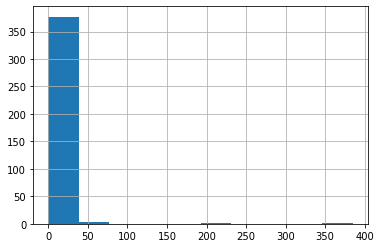

In [68]:
# Столбец показывающий количество пропусков. Простой взгляд на цифры даёт большой диапазон
# значений, так что лучше сразу перейти к графикам
mattest.absences.hist()

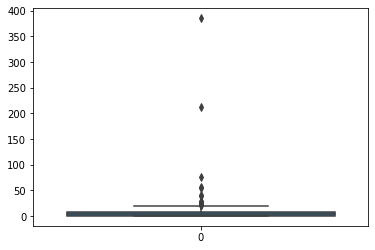

In [69]:
# построим ящик с усами чтобы проверить на наличие выбросов
sns.boxplot(data=mattest.absences)

In [70]:
# И гистограмма и блокспот демонстрируют наличие выбросов

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


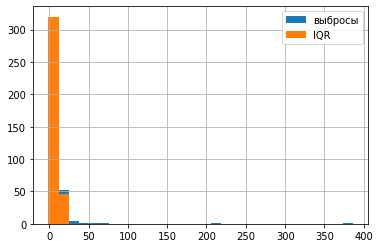

In [71]:
median = mattest.absences.median()
IQR = mattest.absences.quantile(0.75) - mattest.absences.quantile(0.25)
perc25 = mattest.absences.quantile(0.25)
perc75 = mattest.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


mattest.absences.loc[mattest.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  label = 'выбросы')

mattest.absences.loc[mattest.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        label = 'IQR')
plt.legend();

In [72]:
pd.DataFrame(mattest.absences.value_counts()).T

,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,3.0,16.0,7.0,5.0,18.0,20.0,22.0,9.0,...,25.0,54.0,385.0,26.0,56.0,24.0,212.0,21.0,75.0,30.0,19.0,38.0,40.0,23.0,17.0,28.0
absences,111,60,53,31,21,17,12,12,8,7,6,5,5,4,3,3,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [73]:
# Однако, просмотр данных показывает, что экстраординарных значений здесь всего два: 212.0 и
# 385.0, так что здравый смысл подсказывает, что достаточно удалить только их

In [76]:
mattest.loc[mattest['absences'] >= 211.0, 'absences'] = np.nan
mattest.absences.describe()

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [75]:
pd.DataFrame(mattest.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


In [84]:
# Переходим к целевому столбцу 'score'
mattest.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [90]:
# У нас имеются незаполненные ячейки в целевом показателе. Их всего 6, но мы никоим образом
# не можем их предсказать или определить, так что имеет смысл их удалить сразу
mattest['score'].replace('', np.nan, inplace = True)
mattest.dropna(subset=['score'], inplace = True)
mattest.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [ ]:
# и теперь переходим непосредственно к анализу целевого параметра

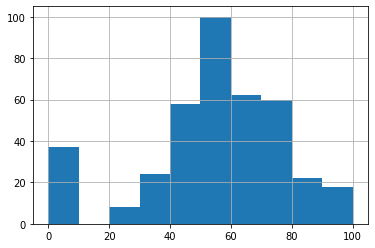

In [91]:
mattest.score.hist()

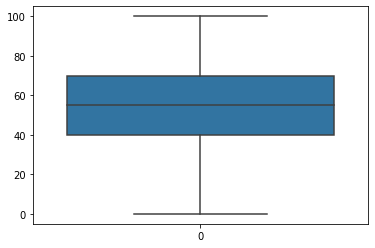

In [92]:
# на первый взгляд слева виден выброс из нулевых значений, проверим это через боксплот
sns.boxplot(data=mattest.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


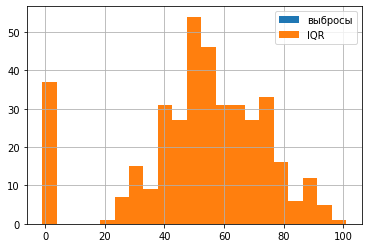

In [93]:
median = mattest.score.median()
IQR = mattest.score.quantile(0.75) - mattest.absences.quantile(0.25)
perc25 = mattest.score.quantile(0.25)
perc75 = mattest.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


mattest.score.loc[mattest.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  label = 'выбросы')

mattest.score.loc[mattest.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        label = 'IQR')

plt.legend();

In [94]:
mattest.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

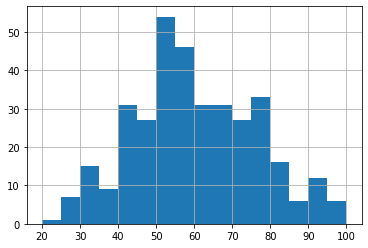

In [95]:
# Необходимо принять решение, допустимо ли удалить также значения равные 0.0. С одной стороны,
# эти строки содержат полноценные данные по другим столбцам, с другой, целью будущей модели 
# является предсказание результатов экзаменов по математике, то есть предсказание score,  
# отличного от нуля. С этой точки зрения, датасет без клюевого параметра не может быть
# информативным. И логика подсказывает очистить и нули в score тоже.

mattest.loc[mattest['score'] == 0.0, 'score'] = np.nan
mattest.score.hist(bins=16)

In [97]:
# Переходим к корреляционному анализу
# 1. Смотрим корреляции для числовых столбцов
mattest_num = mattest[['age', 'absences', 'score']]

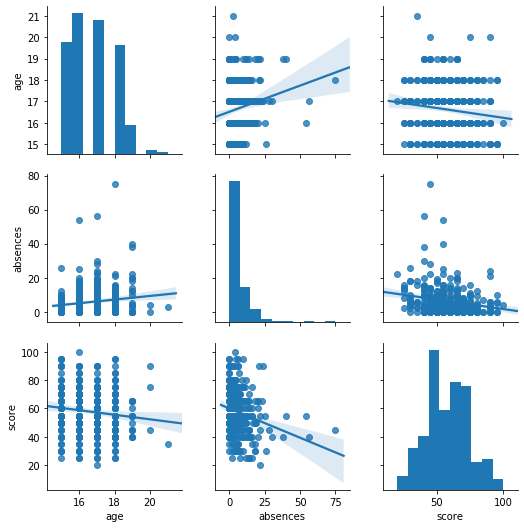

In [98]:
sns.pairplot(mattest_num, kind = 'reg')

In [99]:
mattest_num.corr()

,age,absences,score
age,1.000000,0.161980,-0.121579
absences,0.161980,1.000000,-0.214926
score,-0.121579,-0.214926,1.000000


In [100]:
# Оба критерия слабо коррелируют между собой, поэтому оставляем оба

In [101]:
# Далее рассмотрим нечисловые или категориальные столбцы данных. Они у нас двух типов: 
#  те у которых два значения: 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 
# 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school'
# и те, что содержат больше значений в виде оценочных шкал: 'Medu', 'Fedu', 'Mjob', 'Fjob', 
# 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout','health'


In [102]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y='score', 
                data=mattest.loc[mattest.loc[:, column].isin(mattest.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


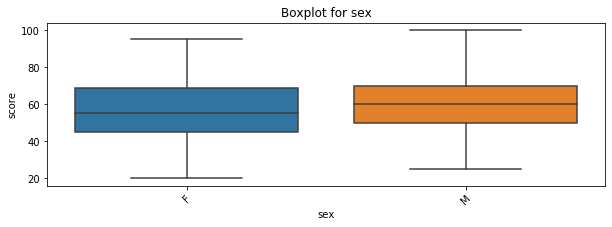

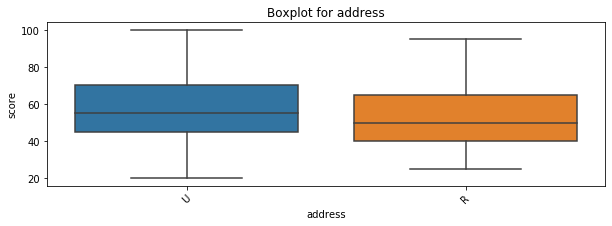

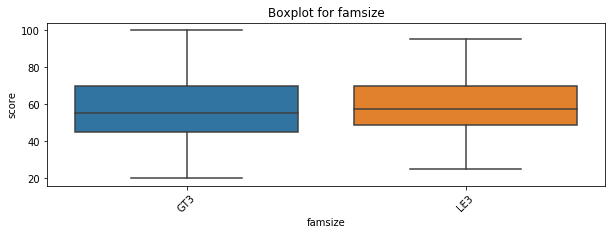

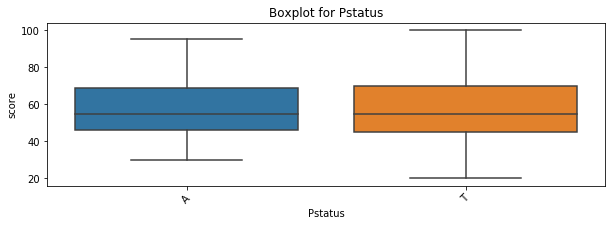

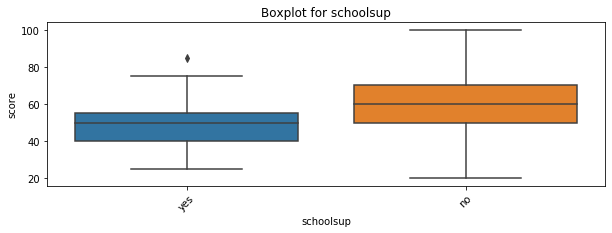

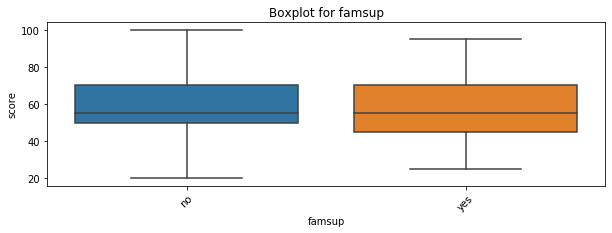

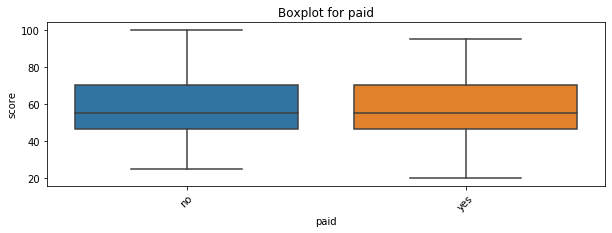

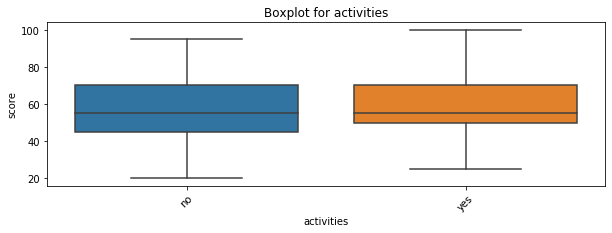

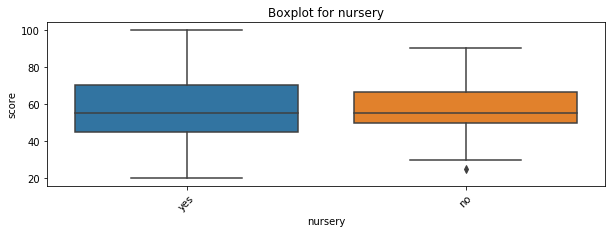

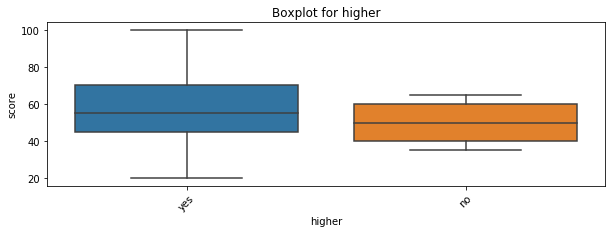

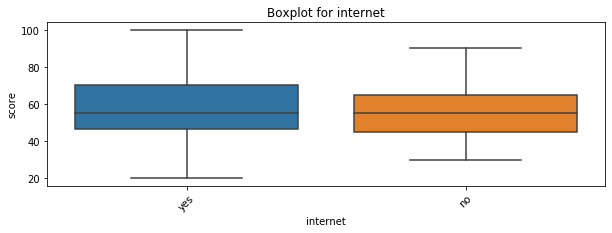

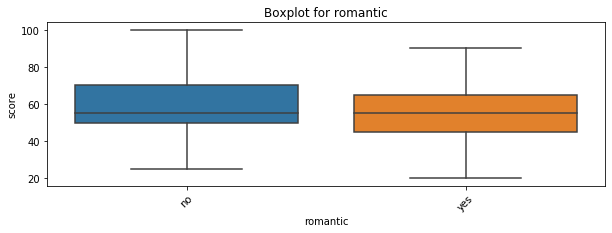

In [103]:
for col in sup1:
    get_boxplot(col)

In [104]:
# визуально существенные отличия заметны для столбцов higher, nursery, schoolsup, значит
# будем анализировать их дополнительно ниже

In [105]:
# Анализируем столбцы с оценочными шкалами, в которых больше значений

In [106]:
sup5 = ('Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'famrel', 'freetime', 'goout','health')
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=mattest.loc[mattest.loc[:, column].isin(mattest.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

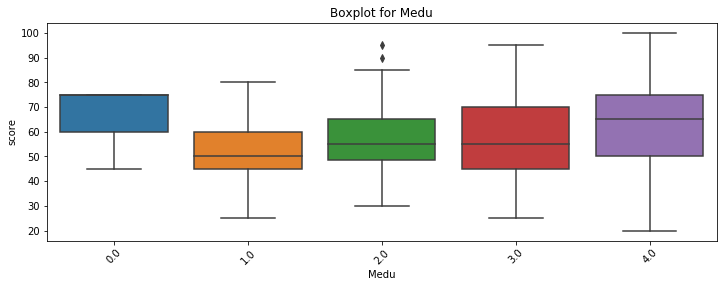

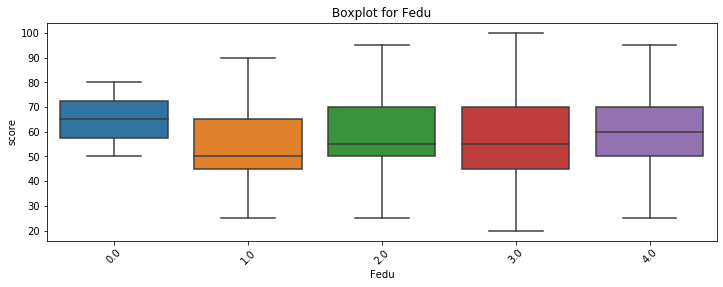

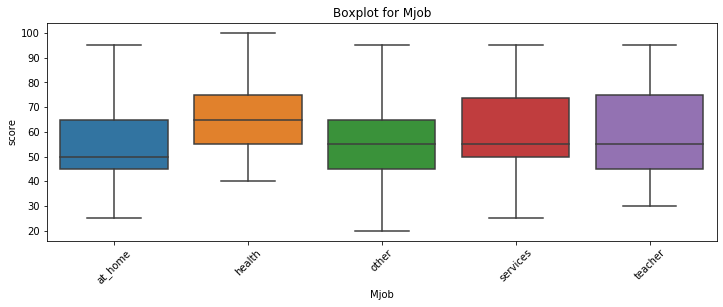

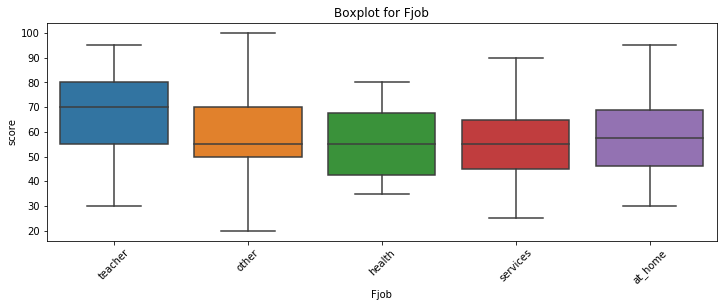

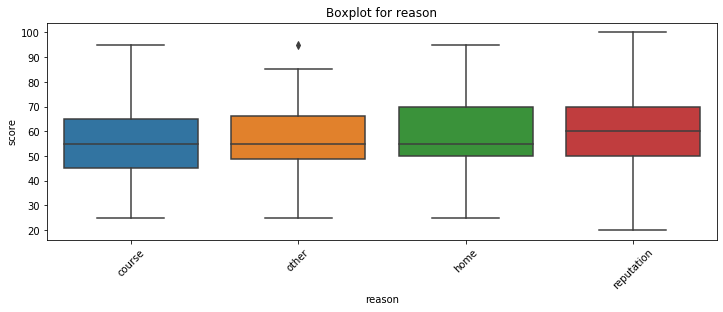

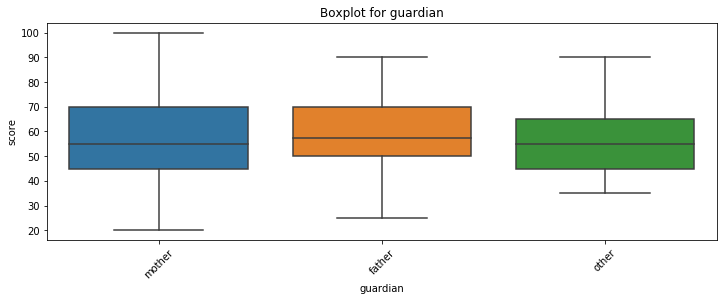

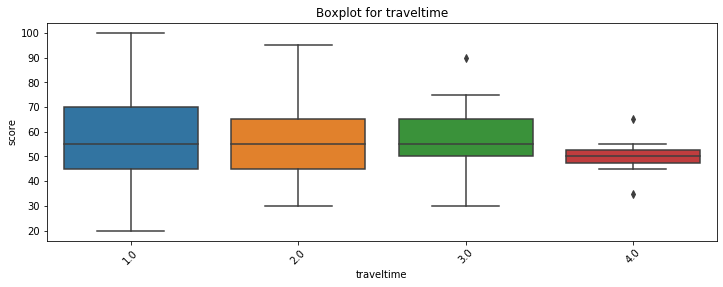

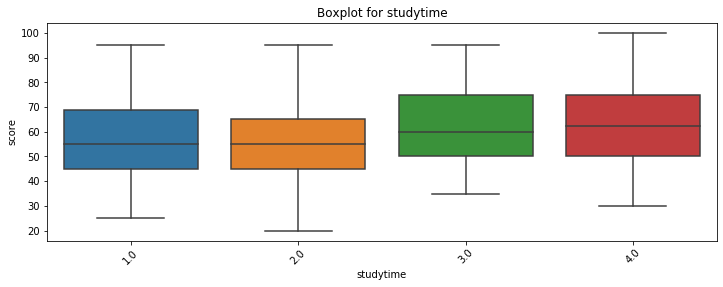

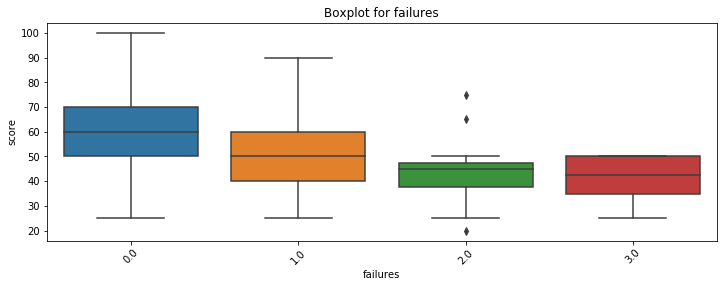

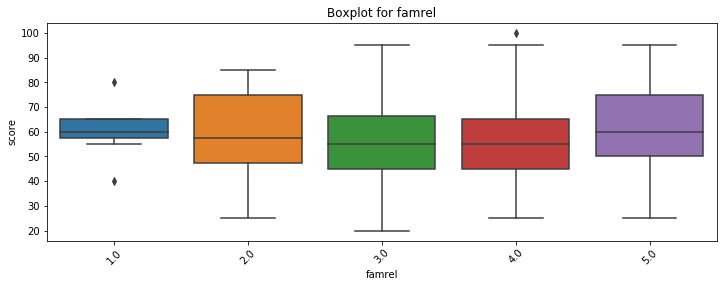

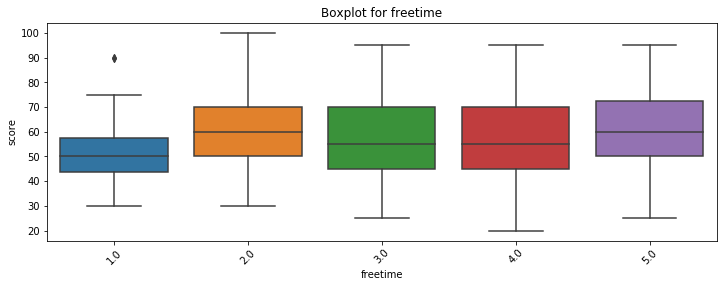

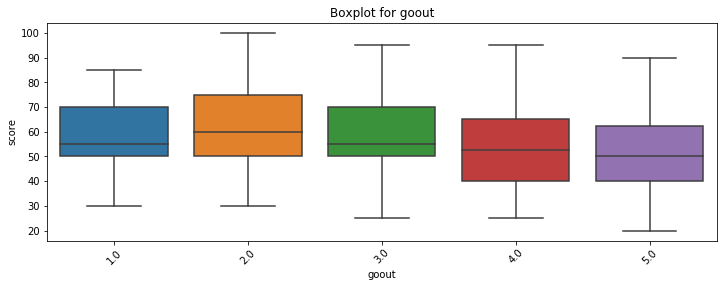

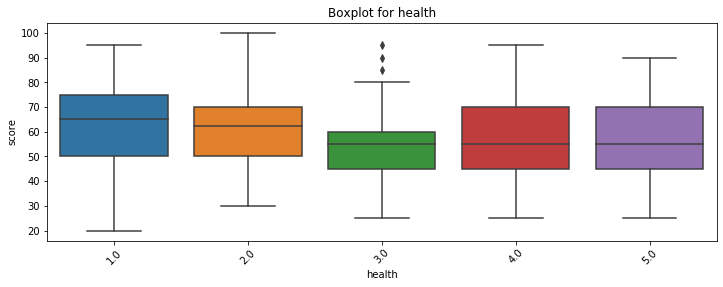

In [107]:
for col in sup5:
    get_boxplot(col)

In [108]:
# визуально можно выделить параметры: Medu, Fedu, Mjob, traveltime, studytime, failures, health

# Дальше проведём тест Стьюдента 

In [117]:
all_col = []
all_col.extend(sup1)
all_col.extend(sup5)


def get_stat_dif(column):
    cols = mattest.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(mattest.loc[mattest.loc[:, column] == comb[0], 'score'].dropna(),
                          mattest.loc[mattest.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!Найдены статистически значимые различия для колонки!', column)
            break

In [118]:
for data in all_col:
    get_stat_dif(data)

!Найдены статистически значимые различия для колонки! address
!Найдены статистически значимые различия для колонки! schoolsup
!Найдены статистически значимые различия для колонки! Medu
!Найдены статистически значимые различия для колонки! Fedu
!Найдены статистически значимые различия для колонки! Mjob
!Найдены статистически значимые различия для колонки! Fjob
!Найдены статистически значимые различия для колонки! studytime
!Найдены статистически значимые различия для колонки! failures
!Найдены статистически значимые различия для колонки! goout


In [114]:
# Тест Стюдента показал, что 9 столбцов или переменных из списка категориальных колонок имеют 
# статистически значимые различия. 
#Вместе с 3 числовыми переменными мы можем дать следующий датасет для будущей модели:

In [115]:
mattest_final = mattest.loc[:,['address', 'schoolsup', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                              'studytime', 'failures', 'goout', 'age', 'absences', 'score']]

In [116]:
mattest_final.head()

,address,schoolsup,Medu,Fedu,Mjob,Fjob,studytime,failures,goout,age,absences,score
0,U,yes,4.0,4.0,at_home,teacher,2.0,0.0,4.0,18.0,6.0,30.0
1,U,no,1.0,1.0,at_home,other,2.0,0.0,3.0,17.0,4.0,30.0
2,U,yes,1.0,1.0,at_home,other,2.0,3.0,2.0,15.0,10.0,50.0
3,U,no,4.0,2.0,health,other,3.0,0.0,2.0,15.0,2.0,75.0
4,U,no,3.0,3.0,other,other,2.0,0.0,2.0,16.0,4.0,50.0


In [ ]:
# Итоги
# В результате разведывательного анализа EDA на предмет влияния разных показателей датасета
# для модели прогнозирования результатов госэкзамена по математике можно сформулировать
# следующие выводы:
 # - данные заполнены не всегда корректно. Есть множество пропусков в столбцах, имеются опечатки
 # - найдены выбросы в данных о возрасте, необъяснимые выбросы в данных о пропусках, нет данных
 # в целевом столбце score, а значит, данные из других столбцов по этим строкам не могут быть
 # использованы. Такие выбросы были исключены. 
 # - Найден фейковый столбец studytime, granular, который мог образоваться как технический сбой
 # при выгрузке, либо использовался на промежуточном этапе, а затем не был удалён
 # - из представленных в начальном датасете 29 параметров для финальной модели статистическую
 # значимость показали: address, schoolsup, Medu, Fedu, Mjob, Fjob, studytime, failures,
 # goout, age, absenses, score - итого 12 с учётом целевого показателя будущей модели score